# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask
modified by Nathan Maynes

- **Trask Twitter**: @iamtrask
- **Trask Blog**: http://iamtrask.github.io
- **Maynes Twitter**: @nathanmaynes

### Concepts We Will Use

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it

- Extra Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning)
- Shoot a tweet @iamtrask or @nathanmaynes


# Curate a Dataset

In [2]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [3]:
len(reviews)

25000

In [4]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [5]:
labels[0]

'POSITIVE'

# Develop a Predictive Theory

In [6]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Quick Theory Validation

In [7]:
from collections import Counter
import numpy as np

In [8]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [9]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [10]:
positive_counts.most_common(10)

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235)]

In [11]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [12]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common(10)

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498)]

In [13]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common(10)))

[('superbly', 2.2600254785752498),
 ('flawless', 2.451005098112319),
 ('gandhi', 2.5389738710582761),
 ('mildred', 2.6026896854443837),
 ('victoria', 2.6810215287142909),
 ('matthau', 2.8067217286092401),
 ('polanski', 2.8233610476132043),
 ('felix', 3.1527360223636558),
 ('paulie', 4.0775374439057197),
 ('edie', 4.6913478822291435)]

# Transforming Text into Numbers

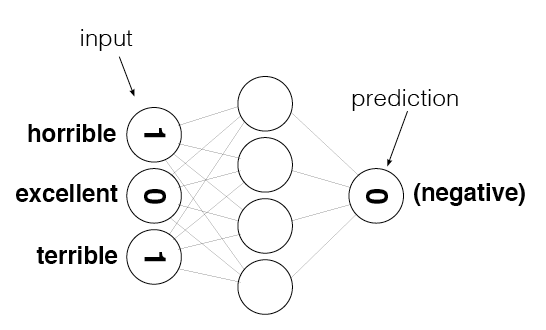

In [14]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

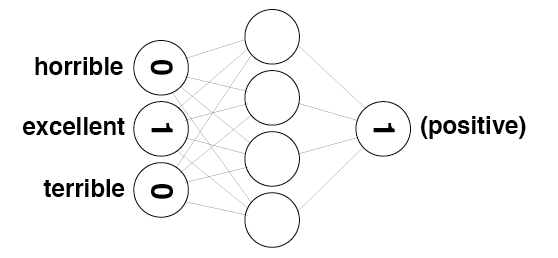

In [15]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Creating the Input/Output Data

In [16]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [17]:
list(vocab)[0:10]

['',
 'iaac',
 'ich',
 'sanctions',
 'corrosive',
 'fared',
 'animalplanet',
 'frowning',
 'forefathers',
 'munchies']

In [18]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

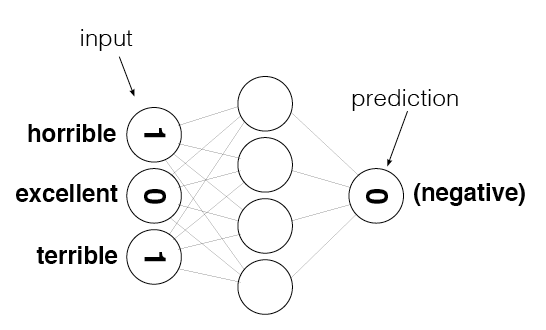

In [19]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [20]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index


{'': 0,
 'iaac': 1,
 'ich': 2,
 'sanctions': 3,
 'corrosive': 4,
 'fared': 5,
 'animalplanet': 6,
 'frowning': 7,
 'forefathers': 8,
 'munchies': 9,
 'thicket': 10,
 'despairs': 11,
 'discomfiture': 12,
 'floater': 13,
 'zaniness': 14,
 'fortuate': 15,
 'verges': 16,
 'wii': 17,
 'leak': 18,
 'deirdre': 19,
 'wooley': 20,
 'bams': 21,
 'helm': 22,
 'ventriloquist': 23,
 'kellogg': 24,
 'ngoyen': 25,
 'cratchit': 26,
 'conditioned': 27,
 'tinkered': 28,
 'widen': 29,
 'anguished': 30,
 'lokis': 31,
 'squabbling': 32,
 'silvio': 33,
 'contribute': 34,
 'daisenso': 35,
 'yellower': 36,
 'meridian': 37,
 'trendy': 38,
 'crocodiles': 39,
 'goobacks': 40,
 'mugged': 41,
 'paz': 42,
 'corner': 43,
 'tarasco': 44,
 'gowky': 45,
 'jabbed': 46,
 'arthritic': 47,
 'slitting': 48,
 'theissen': 49,
 'stereophonics': 50,
 'biosphere': 51,
 'adverts': 52,
 'spots': 53,
 'supplies': 54,
 'outdo': 55,
 'mortadello': 56,
 'foisting': 57,
 'slobs': 58,
 'possession': 59,
 'deewana': 60,
 'downloading': 6

In [23]:
# Dictionary slicing function to explore the word2index dictionary
def slice_dict(d):
    return {k:v for k,v in d.items() if (v < 11) } # return key, values for first ten entries
slice_dict(word2index)

{'': 0,
 'animalplanet': 6,
 'corrosive': 4,
 'fared': 5,
 'forefathers': 8,
 'frowning': 7,
 'iaac': 1,
 'ich': 2,
 'munchies': 9,
 'sanctions': 3,
 'thicket': 10}

In [24]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [25]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [26]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [27]:
labels[0]

'POSITIVE'

In [28]:
get_target_for_label(labels[0])

1

In [29]:
labels[1]

'NEGATIVE'

In [30]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

In [31]:
# Initialize the Neural Network for Sentiment Analysis
# Psuedo Code
# define our neural network class, its an object:
#     def the initialization function, parameters are self, reviews, labels, hidden_nodes, learning_rate:
#         set the random seed generator
#         preprocess the data, normalize it, vectorize it
#         initialize the network with the following parameters, size of our vocab list, number of hidden nodes, number of output nodes, learning rate
#     def our preprocess function, parameters are self, reviews, label
#         create a set of the words in reviews
#         create a set of the words in labels (In this problem there are only 2)
#         create a dictionary of the words in reviews
#         create a dictionary of the words in labels
#     def our initialize function with the parameters self, input_nodes, hidden_nodes, output_nodes, learning_rate
#         set the number of input nodes, hidden_nodes, and output nodes
#         set the learning_rate
#         set the workspace layer. best practice to allocate the memory and initialize the array with zeros
#     def our input update layer function with parameters self and a review - this function will be processing one review at a time
#         clear out previous workspace layer by setting values to zero
#         loop through words in each review, if found increment the count in workspace layer
#     def our label classification function, parameter is layer
#         if label is positive return 1 else 0
#     def sigmoid function
#     def sigmoid function derivative
#     def train function with parameters self, train_reviews, train_labels
#         for each review in the training set
#             set the input layer
#             set the hidden layer
#             set the output layer
#             implement a forward pass
#             implement a backwards pass
#             update the training weights
#     def test function with parameters self, test_reviews, test_labels
#         for each review in the testing set
#             call the run function and compare the predicted label with the actual label
#     def run function with parameters self, review
#         set the input layer
#         set the output layer
#         if the output layer is greater than .5 assign the review a positive label else a negative label

In [32]:
import time
import sys
import numpy as np

class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
                
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1   
            
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        # Test to make sure the reviews and labels are the same size
        assert(len(training_reviews) == len(training_labels))
        
        # Counter value to check how many preditions we get right before and after training
        correct_so_far = 0
        
        # Timer function 
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            # Timing statistics
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

# Call Our Sentiment Network

In [ ]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [ ]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

In [ ]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

# Checking The Results
- How much more accurate are the results after training?

# Teaser
- What would happen if a review had been positive but described problems with toxic waste? The text might look like, 
> The disgusting truth of toxic waste dumping has never been portrayed more accurately. Terrible truth, fantastic movie.
- How could we control for such situations? 
- What are possible downsides of trying to predict outlier cases?